# Data Analysis Interview Challenge 


## Part 1- Exploratory Data Analysis

In [16]:
#import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

%matplotlib inline

In [17]:
#read file

logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [18]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [21]:
logins_df = logins_df.set_index('login_time')

In [32]:
agg_15m = logins_df.groupby(pd.Grouper(freq='15Min')).size()

In [46]:
agg_15m_df = agg_15m.to_frame()

In [47]:
agg_15m_df.head()

,0
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [49]:
agg_15m_df.columns = ['count']

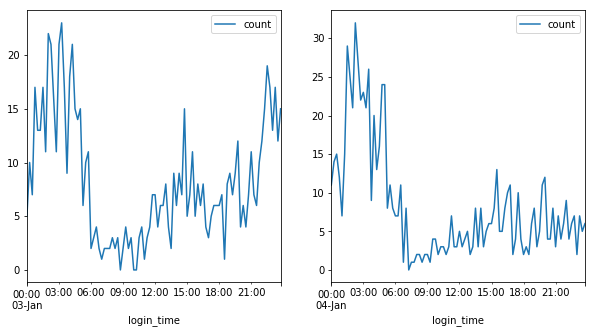

In [104]:
fig,ax  = plt.subplots(1,2)

agg_15m_df.loc['1970-01-03':'1970-01-03'].plot(ax=ax[0],figsize=(10,5))
agg_15m_df.loc['1970-01-04':'1970-01-04'].plot(ax=ax[1],figsize=(10,5))


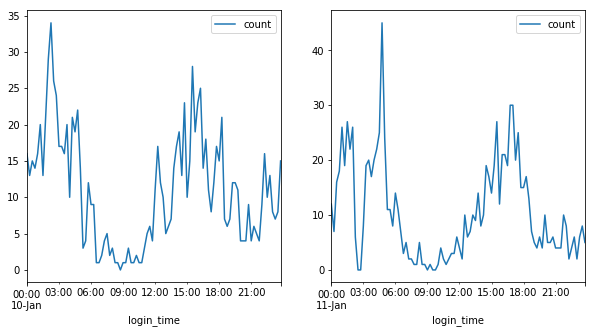

In [115]:
fig,ax  = plt.subplots(1,2)

agg_15m_df.loc['1970-01-10':'1970-01-10'].plot(ax=ax[0],figsize=(10,5))
agg_15m_df.loc['1970-01-11':'1970-01-11'].plot(ax=ax[1],figsize=(10,5))


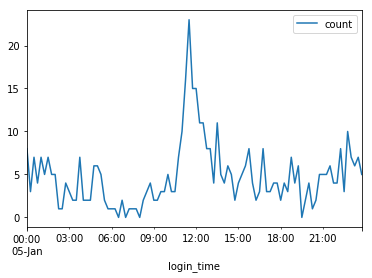

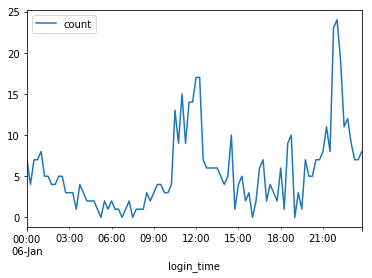

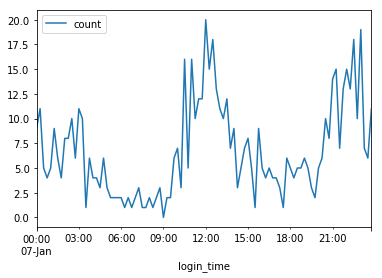

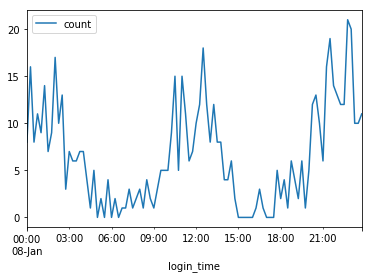

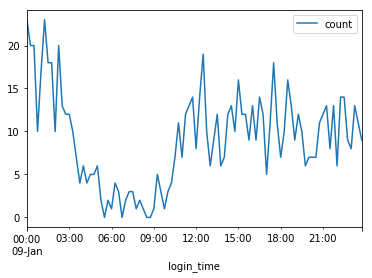

In [114]:
agg_15m_df.loc['1970-01-05':'1970-01-05'].plot()
agg_15m_df.loc['1970-01-06':'1970-01-06'].plot()
agg_15m_df.loc['1970-01-07':'1970-01-07'].plot()
agg_15m_df.loc['1970-01-08':'1970-01-08'].plot()
agg_15m_df.loc['1970-01-09':'1970-01-09'].plot()

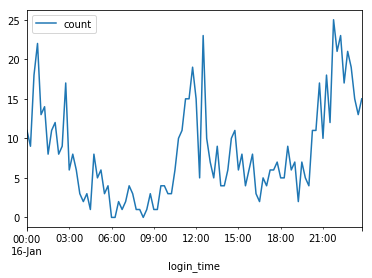

In [116]:
agg_15m_df.loc['1970-01-16':'1970-01-16'].plot()

The logins.json file contains timestamps of user logins in a particular geographic location. I aggregated this data into 15 minute intervals and than graph the aggregate by day. From this we can see an interesting trend. There are two noticable patterns from the five days I graph. Immediately, I assumed a difference in login days between weekends and weekdays. My assumptions were proven true with some research. 

On weekends, theres a noticable 2 peaks of activity compared to weekdays with 3 peaks. This can corresponds to the daily work day of 8 hours and a lunch break around the 12:00 time slot, indicated by the surge of activity. 

**For weekends majority of activity happens between 0:00 to 6:00 and 12:00 to 18:00. Indicating most activity during early morning to early afternoon.** 

**For weekdays majority of activity happens between 00:00 to 6:00, around 12:00, and after 19:00. Inidcating most activity during early mornings, midday, and late night.** 

There are exceptions between days, however the general trend corresponds to my observations.

## Experiement and metrics design

- Weekdays: UG is most active at night, UM is most active during the day. 
- Weekends, there is resonable activity on both cities.
- Toll causing driver partners to stay exclusive to one city. 
- Goal: Encourage driver partners to be available in both cities, by reimbursing toll cost.

Questions:
- What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
- Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    - how you will implement the experiment
    - what statistical test(s) you will conduct to verify the significance of the observation
    - how you would interpret the results and provide recommendations to the city operation team along with any caveats.

**1: How can we quantify a performance metric between drivers,the city and activity?**
- login activity and location 
- track drivers before implementing toll reimbursement and than compare the location of the drivers after implmentation. (Weekend vs weekdays) If implementation was successful there will be activity in both cities during every day of the week. 
- log the amount of tolls accumulated before implementation of toll reimbursement and after. 

From the problem we can determine UG has high activity at night and UM has high activity during the day. Because of tolls drivers are more inclined to stay within the designated city this indicates a lack of activity either in the day or night depending on the city. Our goal is encourage driver partners to be available in both cities, by reimbursing toll cost.

To determine the performance of the experiment I would suggest calculating activity by day and night for each city. More specifically the ratio between night and day between each city or the **percentage of activity of drivers and calculte the mean per week**. If our experiment proves successfully the percentages of day and night activity would be equivalent. 



**2: Practical experiment**

We can perform a Null Hypothesis test.

We have two populations of interest UG and UM drivers. We can create a test that samples small groups in order to determine the statistical significance of the population.

- Null: reimbursment has no effect on activity between cities  
- Alternatie: reimbursement has an effect on activity beteeen cities

Evidence: login activity, number of drivers, time of day

We need to calculate the p-value in order to determine whether we reject null hypothesis.P-value will represent how likely is activity not different between cities given evidence. 
- small p-value is not likely , reject null hypothesis. 

Threshold will be set up by alpha of 0.05. 

We can then perform a T-test. Comparing the mean of the two samples (activity percentage of UG vs activity percentage of UM)



## Predictive Modeling

In [121]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

In [427]:
ult_df = pd.DataFrame(data)

In [428]:
ult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [429]:
ult_df.isnull().values.any()

True

In [430]:
ult_df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [431]:
ult_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [432]:
ult_df = ult_df[np.isfinite(ult_df['avg_rating_by_driver'])]

In [433]:
ult_df = ult_df.dropna(subset=['phone'])

In [434]:
ult_df.isnull().sum()

avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      7961
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [435]:
median = ult_df['avg_rating_of_driver'].median()
ult_df['avg_rating_of_driver'].fillna(median,inplace= True)

In [436]:
ult_df.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

**Cleaning**

The first step in our data science process is to access import the data set, read it , and clean it. Using pandas I imported the data and converted it into a data frame. Using functions such as .info, .isna, .sum. We are able to access the data set for missing values. 

There are a couple of apporachs in handling missing values. This includes dropping certain rows or replacing them. Because certain columns contain small amounts of missing values compared to the overall quantity of observations I choose to drop these (phone, avg_rating_by_driver), however, one other column contain a substantial amnount of missing values, I therefore replaced those values with the median value of the column. 

In [437]:
ult_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,49406.000000,49406.000000,49406.000000,49406.000000,49406.000000,49406.000000,49406.000000
mean,5.783987,4.777861,4.649783,1.074617,8.846788,2.284176,60.913282
std,5.627329,0.447114,0.574844,0.221009,19.890166,3.799164,37.023166
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.700000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [438]:
ult_df.surge_pct.value_counts().head()


0.0      33945
100.0     1379
50.0      1361
33.3      1147
25.0       897
Name: surge_pct, dtype: int64

In [439]:
ult_df.trips_in_first_30_days.value_counts().head()


0    15219
1    13851
2     7330
3     3759
4     2547
Name: trips_in_first_30_days, dtype: int64

In [440]:
ult_df.weekday_pct.value_counts().head()


100.0    16393
0.0       9050
50.0      4020
66.7      2070
33.3      1608
Name: weekday_pct, dtype: int64

In [441]:
ult_df.shape

(49406, 12)

In [442]:
ult_df.nunique()

avg_dist                  2899
avg_rating_by_driver        27
avg_rating_of_driver        37
avg_surge                  115
city                         3
last_trip_date             182
phone                        2
signup_date                 31
surge_pct                  367
trips_in_first_30_days      59
ultimate_black_user          2
weekday_pct                664
dtype: int64

Using some basic pandas functions we are able to get a better understanding of the overall data. From get columns descriptive statistics, to accessing the number of entries in the dataset, and the total number of unique values of columns.



In [443]:
ult_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [444]:
ult_df.trips_in_first_30_days.value_counts().head()

0    15219
1    13851
2     7330
3     3759
4     2547
Name: trips_in_first_30_days, dtype: int64

In [445]:
ult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49406 non-null float64
avg_rating_by_driver      49406 non-null float64
avg_rating_of_driver      49406 non-null float64
avg_surge                 49406 non-null float64
city                      49406 non-null object
last_trip_date            49406 non-null object
phone                     49406 non-null object
signup_date               49406 non-null object
surge_pct                 49406 non-null float64
trips_in_first_30_days    49406 non-null int64
ultimate_black_user       49406 non-null bool
weekday_pct               49406 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [446]:
ult_df.last_trip_date.sort_values().tail()

25109    2014-07-01
41511    2014-07-01
41521    2014-07-01
6776     2014-07-01
13504    2014-07-01
Name: last_trip_date, dtype: object

The last date recorded is July, 1 2014. Therefore to get active members, we need to aggregate all members who were active in the last 30 days.

In [447]:
ult_df['last_trip_date'] = pd.to_datetime(ult_df['last_trip_date'])

In [448]:
mask = (ult_df['last_trip_date'] >= '2014-06-01') & (ult_df['last_trip_date']<'2014-07-01')

In [449]:
last_30_df = ult_df.loc[mask]



In [450]:
last_30_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
13,3.04,5.0,4.0,1.38,King's Landing,2014-06-08,iPhone,2014-01-29,50.0,0,False,50.0
16,10.86,3.0,5.0,1.00,King's Landing,2014-06-28,Android,2014-01-11,0.0,1,True,50.0


In [451]:
last_30_df['active'] = 1

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [452]:
last_30_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1
13,3.04,5.0,4.0,1.38,King's Landing,2014-06-08,iPhone,2014-01-29,50.0,0,False,50.0,1
16,10.86,3.0,5.0,1.00,King's Landing,2014-06-28,Android,2014-01-11,0.0,1,True,50.0,1


In [453]:
last_30_s = last_30_df['active']

In [454]:
ult_df = ult_df.merge(last_30_s.to_frame(),left_index=True,right_index=True,how='outer')

In [455]:
ult_df = ult_df.fillna(0)

In [456]:
ult_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


Text(0, 0.5, 'count')

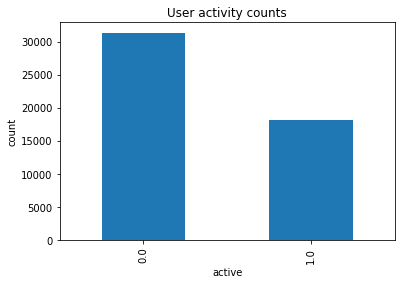

In [457]:

ult_df.groupby('active').size().plot(kind='bar')
plt.title('User activity counts')
plt.ylabel('count')

In [458]:
ult_df.groupby('active').size()

active
0.0    31316
1.0    18090
dtype: int64

In [461]:
print('total users that signed up:', 31316+18090)
print('percentage of active users:', 18090/49406)
print('percentage of non-active users:',31316/49406)


total users that signed up: 49406
percentage of active users: 0.3661498603408493
percentage of non-active users: 0.6338501396591507


#### From my analysis, we can see a total of 49,406 users that signed up in January 2014. Aggregating the data by activity and size, we can see **~36.6%** of those users remained active (18,090 users). 

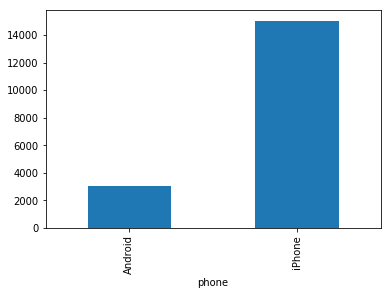

In [462]:
ult_df.groupby('phone')['active'].sum().plot(kind='bar')

In [463]:
ult_df.groupby('phone')['active'].sum()

phone
Android     3051.0
iPhone     15039.0
Name: active, dtype: float64

In [464]:
ult_df.groupby('phone')['active'].size()

phone
Android    14960
iPhone     34446
Name: active, dtype: int64

In [465]:
print('total Iphone users:', 34446)
print('total Andriod users:', 14960)
print('percentage of iphone users retained:',15039/34446)
print('percentage of andriod users retained:',3051/14960)

total Iphone users: 34446
total Andriod users: 14960
percentage of iphone users retained: 0.4365964117749521
percentage of andriod users retained: 0.20394385026737968


In [466]:
34446+14960

49406

The percentage of iphone useres retained is around **44%** compared to andriod users at around **20%**

### Logistic Regression

In [467]:
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression



In [468]:
ult_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


#### preprocessing

In [469]:
#create dummies for categorical variables 

ult_df_model = pd.get_dummies(ult_df,columns=['city','phone','ultimate_black_user'],drop_first=True)

In [470]:
ult_df_model.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,active,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1.0,1,0,1,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0.0,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0.0,0,0,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1.0,1,0,1,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0.0,0,1,0,0


In [471]:
ult_df_model = ult_df_model.drop('last_trip_date',axis=1)
ult_df_model = ult_df_model.drop('signup_date',axis=1)



In [472]:
ult_df_model.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1.0,1,0,1,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0.0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0.0,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1.0,1,0,1,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0.0,0,1,0,0


In [473]:
X = ult_df_model.drop('active',axis=1)
y = ult_df_model['active'].copy()

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [475]:
#standardize features
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.transform(X_test)

#### model

In [476]:
log_reg = LogisticRegression()

log_reg.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [477]:
print('Training set accuracy:', accuracy_score(log_reg.predict(X_train_std),y_train))
print('Testing set accuracy:', accuracy_score(log_reg.predict(X_test_std),y_test))

Training set accuracy: 0.7175134095739297
Testing set accuracy: 0.714936247723133


In [478]:
from sklearn.metrics import classification_report 

log_class_train = classification_report(y_train,log_reg.predict(X_train_std))
print(log_class_train)

             precision    recall  f1-score   support

        0.0       0.74      0.86      0.79     25027
        1.0       0.66      0.47      0.55     14497

avg / total       0.71      0.72      0.70     39524



In [479]:
log_class_test = classification_report(y_test,log_reg.predict(X_test_std))
print(log_class_test)

             precision    recall  f1-score   support

        0.0       0.74      0.86      0.79      6289
        1.0       0.65      0.46      0.54      3593

avg / total       0.71      0.71      0.70      9882



Since this is a binary classification problem, predicting whether a user will be active or not, I will first use a logistic regression model for a baseline. 

Using a logistic regression model we obtain an accuracy score of **71.7%** for the training data set and **71.5%** for testing dataset. (seems like there is no overfitting involved).

We also created a classification report for our results. Our baseline model performances for precision is currently at average 71% with having a 74% classification on none-active users and **65%** for classifiying active users. A recall of 86% for recalling non active users and **46%** for recalling active users.

#### random forest

In [510]:
from sklearn.ensemble import RandomForestClassifier

In [511]:
rf = RandomForestClassifier(random_state=42)


In [512]:
rf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [513]:
y_pred_forest = rf.predict(X_test_std)
y_pred_forest_train = rf.predict(X_train_std)

In [514]:
print('Random Forest accuracy Training set: ', accuracy_score(y_pred_forest_train,y_train))
print('Random Forest accuracy Test set:, ', accuracy_score(y_pred_forest,y_test))

Random Forest accuracy Training set:  0.9770519178220828
Random Forest accuracy Test set:,  0.7399311880186197


In [529]:
print(classification_report(y_train,y_pred_forest_train))
print(classification_report(y_test,y_pred_forest))


             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98     25027
        1.0       0.99      0.95      0.97     14497

avg / total       0.98      0.98      0.98     39524

             precision    recall  f1-score   support

        0.0       0.78      0.83      0.80      6289
        1.0       0.66      0.59      0.62      3593

avg / total       0.74      0.74      0.74      9882



To imporve results, I used an ensemble method in random forest. Our results improved slightly. 

**Our training accuracy is now 97%
Our testing accuracy is 74%**

**Precision for non-active users: 78%
Precision for active users: 66%**

**Recall for non-active users: 83%
Recall for active users: 59%**

#### XGBoost

In [515]:
from xgboost import XGBClassifier

In [516]:
xgb = XGBClassifier()

xgb_model = xgb.fit(X_train_std,y_train)

In [517]:
yxgb_pred = xgb.predict(X_test_std)
yxgb_pred_train = xgb.predict(X_train_std)

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/matthewwong/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [528]:
print('XGBoost accuracy Training set: ', accuracy_score(y_train,yxgb_pred_train))
print('XGBoost accuracy Test set: ', accuracy_score(y_test,yxgb_pred))

XGBoost accuracy Training set:  0.7804372027122761
XGBoost accuracy Test set:  0.7766646427848614


In [519]:
print(classification_report(y_train,yxgb_pred_train))
print(classification_report(y_test,yxgb_pred))


             precision    recall  f1-score   support

        0.0       0.81      0.86      0.83     25027
        1.0       0.73      0.64      0.68     14497

avg / total       0.78      0.78      0.78     39524

             precision    recall  f1-score   support

        0.0       0.81      0.85      0.83      6289
        1.0       0.71      0.65      0.68      3593

avg / total       0.77      0.78      0.77      9882



I used another ensemble method called XGBoost, this provided the best performance so far.

**Our training accuracy is now 78%
Our testing accuracy is 77%**

**Precision for non-active users: 81%
Precision for active users: 71%**

**Recall for non-active users: 85%
Recall for active users: 65%**

In [520]:
xgb.feature_importances_

array([0.01465844, 0.2964507 , 0.01667687, 0.00806228, 0.12950635,
       0.02966578, 0.1090987 , 0.1367373 , 0.0370487 , 0.1187146 ,
       0.10338029], dtype=float32)

In [523]:
feature_importances = pd.DataFrame(xgb.feature_importances_, index=X_train.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)

In [527]:
feature_importances

,importance
avg_rating_by_driver,0.296451
city_King's Landing,0.136737
surge_pct,0.129506
phone_iPhone,0.118715
weekday_pct,0.109099
ultimate_black_user_True,0.103380
city_Winterfell,0.037049
trips_in_first_30_days,0.029666
avg_rating_of_driver,0.016677
avg_dist,0.014658


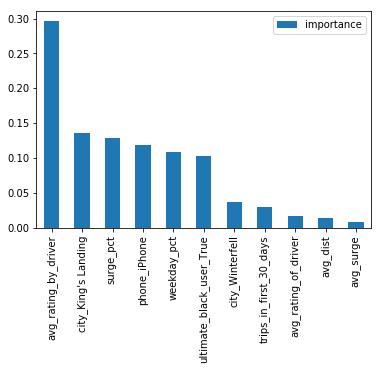

In [526]:
feature_importances.plot(kind='bar')

I also plotted feature importances to get a sense of which features influence the model. The top feature is the average rating by driver followed by wheter the user signed up in King's Landing or not.

## Conclusion

From exploratory data analysis to predictive modeling we can get a intuition of the data. Where the data comes from and how we can predict future outcomes. 

From our exploratory data analysis, we can see only about **37%** of users remain active. Also, from exploring we see majority of our retained users are iphone users. The percentage of iphone useres retained is around **44% compared to andriod users at around 20%**



The XGBoost model provided the best results with and accuracy score of **77% a precision score of 71% and recall of 65%**. With time and proper tuning we can most likely increase the predicitve power of this model. Other techniques can probably be used to increase performance, such as incorporating imbalance techniques such as upsampling or downsampling. 

Feature importances also gives us a unique persepective on the best features that affect prediction. Ultimate can leverage these insights to make informative business decisions. Should we find different ways to target our andriod users, find ways to increase average rating by drivers? All the weaknesses and strengths are found from data analysis. This is why it is beneficial to understand the problem and find the solutions associated with solving the problem.